# Fault shapes

We are here briefly showing the possibility of Noddy to model more complex fault shapes than simple planar faults.

In [1]:
from matplotlib import rc_params

In [2]:
from IPython.core.display import HTML
css_file = 'pynoddy.css'
HTML(open(css_file, "r").read())

In [37]:
import sys, os
import matplotlib.pyplot as plt
# adjust some settings for matplotlib
from matplotlib import rcParams
# print rcParams
rcParams['font.size'] = 15
# determine path of repository to set paths corretly below
repo_path = os.path.realpath('../..')
import pynoddy.history
import pynoddy.experiment
import pynoddy.events


<module 'pynoddy.experiment' from '/Users/flow/git/pynoddy/pynoddy/experiment/__init__.pyc'>

In [28]:
%matplotlib inline

In [29]:
rcParams.update({'font.size': 20})

We will create a model with a listric fault from scratch. In addition to the previous parameters for creating a fault (see notebook 4-Create-model), we now change the fault "geometry" to "Curved" and add parameters defining the amplitude and radius of influence:

In [150]:
reload(pynoddy.history)
reload(pynoddy.events)
nm = pynoddy.history.NoddyHistory()
# add stratigraphy
strati_options = {'num_layers' : 8,
                  'layer_names' : ['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5', 'layer 6', 'layer 7', 'layer 8'],
                  'layer_thickness' : [1000, 500, 500, 500, 500, 500, 1000, 2000]}
nm.add_event('stratigraphy', strati_options )

# The following options define the fault geometry:
fault_options = {'name' : 'Fault_E',
                 'pos' : (3000, 0, 4000),
                 'dip_dir' : 90,
                 'dip' : 30,
                 'slip' : 1000,
                 'amplitude' : 1000.,
                 'radius' : 2000,
                'geometry' : 'Curved',
                'xaxis': 5000., 
                 'yaxis': 5000.0,
                'zaxis' : 39999.0}
nm.add_event('fault', fault_options)
nm.change_cube_size(50)

With these settings, we obtain an example of a listric fault in Noddy:

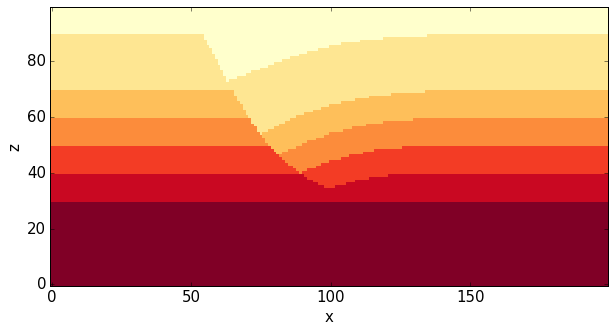

In [151]:
history = "listric_example.his"
outout_name = "listric_out"

nm.write_history(history)
# Compute the model
pynoddy.compute_model(history, output_name) 
# Plot output
reload(pynoddy.output)
nout = pynoddy.output.NoddyOutput(output_name)
nout.plot_section('y', layer_labels = strati_options['layer_names'][::-1], 
                  colorbar = True, title = "",
                  savefig = False, fig_filename = "ex01_fault_listric.eps")